# 020.Polynomial Regression (다항회귀)

#### Non Linear Regression (비선형회귀) 라고도 한다.

2 차 방정식 (Quadratic Equation) 으로 sample data 생성하고 sklearn 으로 coefficient 를 예측해 본다.

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
np.random.seed(101)

**Toy dataset 생성 **

X - training data : (100, 1) random dataset   
y - target data 

$y = 0.5  x^2 + x + 2$ 의 2 차식이라고 가정


**PolynomialFeatures** 


degree = 다항식 차수   
include_bias = True $([1, a, b, a^2, ab, b^2]$, False $([a, b, a^2, ab, b^2])  \rightarrow$ bias term (모두 1 인 column 포함 여부)

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X+ 2 + np.random.randn(m, 1)

In [3]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [4]:
X_poly = poly_features.fit_transform(X)

In [5]:
print(X[:5])

[[ 0.09839177]
 [ 0.42400552]
 [-2.82915464]
 [-1.97087006]
 [ 1.11166189]]


In [6]:
print(X_poly[:5])

[[ 0.09839177  0.00968094]
 [ 0.42400552  0.17978068]
 [-2.82915464  8.00411598]
 [-1.97087006  3.8843288 ]
 [ 1.11166189  1.23579216]]


In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(lin_reg.intercept_) 
print(lin_reg.coef_)

[2.12008955]
[[1.01666339 0.43895863]]


In [9]:
x_range = np.arange(min(X), max(X), 0.1)
yhat = lin_reg.coef_[0, 1] * x_range **2 + lin_reg.coef_[0, 0] * x_range + lin_reg.intercept_

In [10]:
y_pred = lin_reg.predict(X_poly)

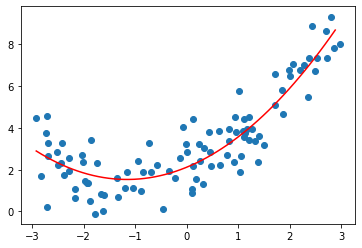

In [11]:
plt.scatter(X, y)
plt.plot(x_range, yhat, 'r');

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

print("R2 Score : ", r2_score(y_pred, y))

R2 Score :  0.7438314097044514


# 실습

**Toy dataset 생성 **

X - training data : (100, 1) random dataset   
y - target data 

$y = 2 * x^3 + 0.5  x^2 + x + 2$ 의 3 차식이라고 가정하여 polynomial regression 을 실시하고 visualize 한다.


In [13]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
np.random.seed(101)

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**3 + 0.5 * X**2 + X+ 2 + np.random.randn(m, 1)

In [15]:
# fit

# visualization